<a href="https://colab.research.google.com/github/jsedoc/ConceptorDebias/blob/master/flair_elmo_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot_sent_embeddings(sent_vec, sentence, 
                         image_width=23, image_height=5):
    sent_len = len(sentence)
        
    plt.figure(figsize=(image_width,image_height))
    plt.imshow(sent_vec[0:sent_len],
            cmap="hot", interpolation='nearest', aspect='auto')
    plt.colorbar()

In [3]:
!pip install -q flair allennlp

    100% |████████████████████████████████| 5.5MB 3.5MB/s 
    100% |████████████████████████████████| 512kB 21.0MB/s 
    100% |████████████████████████████████| 552kB 21.1MB/s 
    100% |████████████████████████████████| 133kB 28.4MB/s 
    100% |████████████████████████████████| 4.5MB 7.7MB/s 
    100% |████████████████████████████████| 1.5MB 11.2MB/s 
    100% |████████████████████████████████| 51kB 17.0MB/s 
    100% |████████████████████████████████| 51kB 17.8MB/s 
    100% |████████████████████████████████| 2.4MB 11.5MB/s 
    100% |████████████████████████████████| 51kB 14.1MB/s 
    100% |████████████████████████████████| 143kB 29.6MB/s 
    100% |████████████████████████████████| 61kB 20.4MB/s 
    100% |████████████████████████████████| 51kB 18.4MB/s 
    100% |████████████████████████████████| 102kB 26.6MB/s 
    100% |████████████████████████████████| 204kB 26.4MB/s 
    100% |████████████████████████████████| 92kB 25.1MB/s 
    100% |████████████████████████████████| 7.5M

In [4]:
from flair.embeddings import BertEmbeddings, ELMoEmbeddings
from flair.data import Sentence


# init embedding
embedding = ELMoEmbeddings() #BertEmbeddings('bert-large-uncased')


/usr/local/lib/python3.6/dist-packages/allennlp/commands/find_learning_rate.py:54: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('Agg') # pylint: disable=multiple-statements,wrong-import-position
100%|██████████| 374434792/374434792 [00:13<00:00, 27687715.90B/s]


In [0]:
# create a sentence
sentence = Sentence('There are slow and repetitive parts , but it has just enough spice to keep it interesting .')


# embed words in sentence
x = embedding.embed(sentence)
se = torch.stack([token.embedding for token in sentence])
sent_emb = se.numpy()

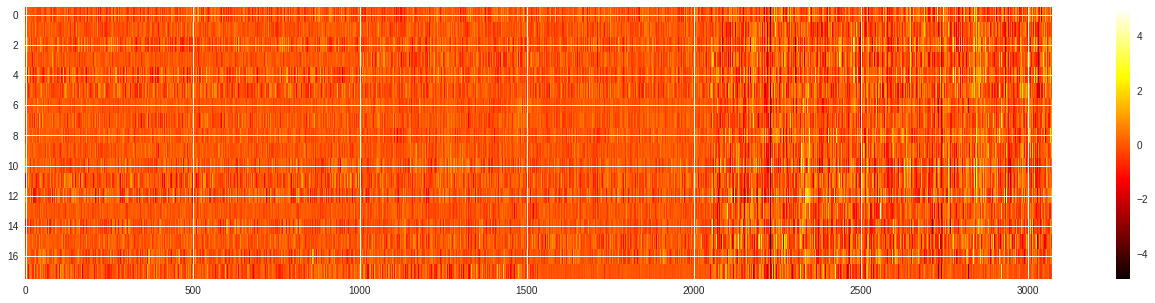

In [6]:
plot_sent_embeddings(sent_emb,sentence)

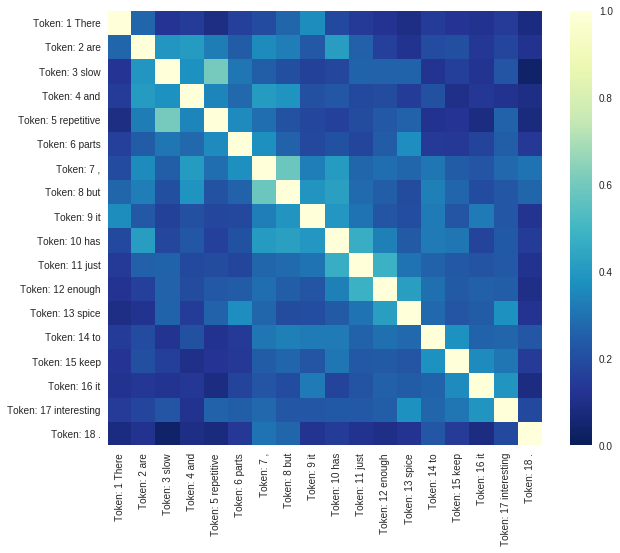

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

x = cosine_similarity(sent_emb)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(x, vmin=0, vmax=1, cmap='YlGnBu_r',
            square=True, ax=ax, xticklabels=[str(token) for token in sentence],
            yticklabels=[str(token) for token in sentence])

In [0]:
embedding = BertEmbeddings('bert-large-uncased')

In [0]:
# embed words in sentence
x = embedding.embed(sentence)
se = torch.stack([token.embedding for token in sentence])
sent_emb = se.numpy()

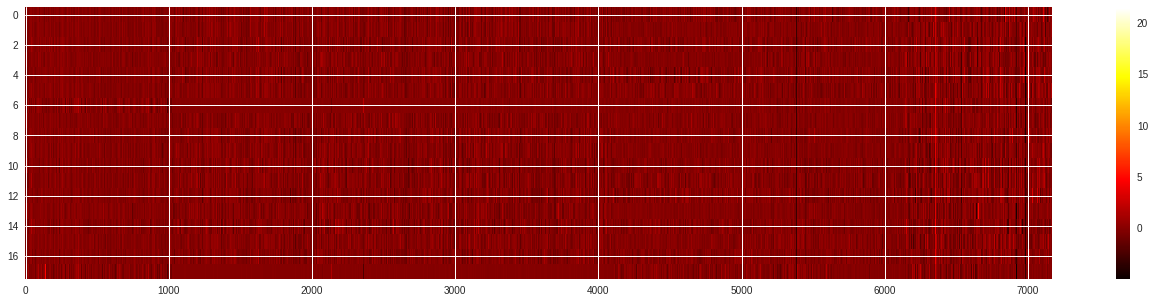

In [10]:
plot_sent_embeddings(sent_emb,sentence)

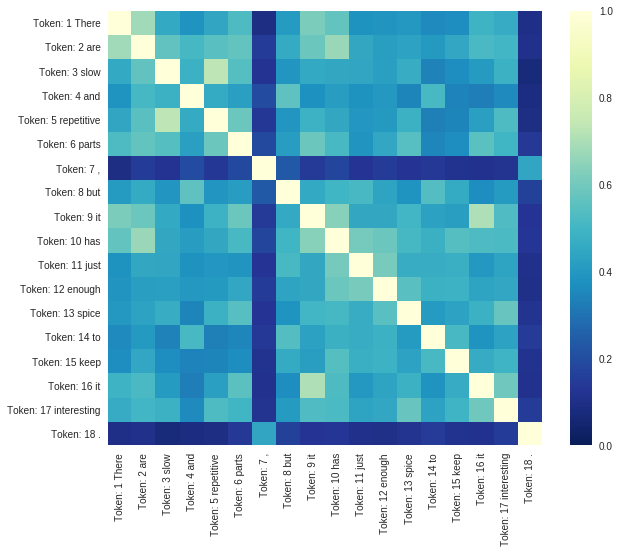

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

x = cosine_similarity(sent_emb)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(x, vmin=0, vmax=1, cmap='YlGnBu_r',
            square=True, ax=ax, xticklabels=[str(token) for token in sentence],
            yticklabels=[str(token) for token in sentence])